### Importing Libraries

In [38]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Reading the Data

In [39]:
data = pd.read_excel("customer_churn_large_dataset.xlsx")

In [40]:
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [77]:
data.shape

(100000, 7)

### Checking for Null Values and datatypes

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [42]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


### Removing unwanted Columns

In [45]:
data.drop(["CustomerID","Name"],axis=1,inplace=True)

### Dividing the data in Positive And Negative Churn

In [46]:
df1=data[data["Churn"]==0]
df2=data[data["Churn"]==1]

In [47]:
df1

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
4,46,Female,Miami,19,58.14,266,0
6,30,Female,Chicago,3,73.79,269,0
...,...,...,...,...,...,...,...
99988,52,Male,Chicago,3,33.33,81,0
99990,62,Male,Chicago,9,36.34,432,0
99992,44,Male,New York,18,45.87,229,0
99994,47,Female,Houston,8,34.58,200,0


In [48]:
df2

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
3,36,Female,Miami,3,97.94,297,1
5,67,Male,New York,15,82.65,456,1
7,67,Female,Miami,1,97.70,396,1
8,20,Female,Miami,10,42.45,150,1
9,53,Female,Los Angeles,12,64.49,383,1
...,...,...,...,...,...,...,...
99993,20,Female,Houston,15,84.72,312,1
99995,33,Male,Houston,23,55.13,226,1
99997,64,Male,Chicago,17,96.11,251,1
99998,51,Female,New York,20,49.25,434,1


### Data Visualization

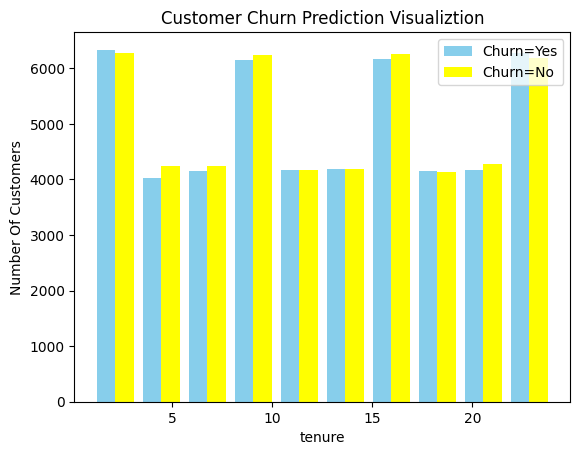

In [49]:
tenure_churn_no = df1.Subscription_Length_Months
tenure_churn_yes = df2.Subscription_Length_Months

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['skyblue','yellow'],label=['Churn=Yes','Churn=No'])
plt.legend()

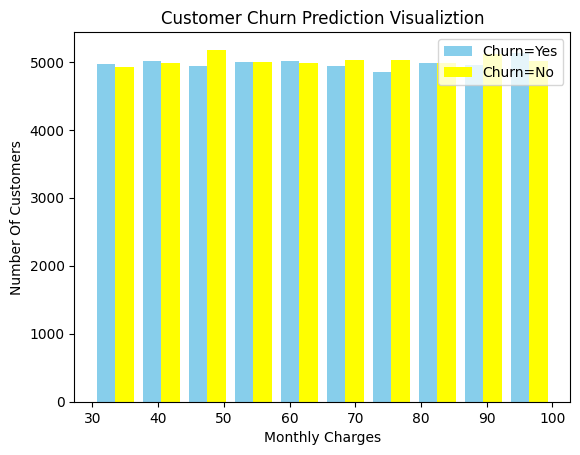

In [50]:
mc_churn_no = df1.Monthly_Bill   
mc_churn_yes = df2.Monthly_Bill    

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], color=['skyblue','yellow'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [51]:
data.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [68]:
f=data.groupby("Churn")["Location"].value_counts()
f


Churn  Location   
0      Houston        10258
       Los Angeles    10161
       Chicago        10013
       Miami           9955
       New York        9834
1      Miami          10076
       New York        9979
       Chicago         9945
       Houston         9899
       Los Angeles     9880
Name: Location, dtype: int64

### Train Test Split

In [75]:
X=data.drop("Churn",axis=1)
y=data["Churn"]

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90000, 6), (10000, 6), (90000,), (10000,))

### Importing more Liraries

In [71]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate

### Encoding And Scaling the data

In [99]:
categorical_features=['Gender','Location']
numerical_features=['Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB']

one_hot_encoder=OneHotEncoder()
standard_scaler=StandardScaler()

preprocessor=ColumnTransformer(transformers=(
    ('encode_gender',one_hot_encoder,categorical_features),
    ('standardization',standard_scaler,numerical_features)
))

In [103]:
preprocessor

ColumnTransformer(transformers=(('encode_gender', OneHotEncoder(),
                                 ['Gender', 'Location']),
                                ('standardization', StandardScaler(),
                                 ['Age', 'Subscription_Length_Months',
                                  'Monthly_Bill', 'Total_Usage_GB'])))

### Checking for the Best Model

### Logistic Regression

In [81]:
clf=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',LogisticRegression())
))

clf.fit(X_train,y_train)
print("Accuracy score of Logistic Regression is: ",clf.score(X_test,y_test))

y_pred=clf.predict(X_test)

print("The precision score of Logistic Regression is: ",precision_score(y_test,y_pred))
print("The recall score of Logistic Regression is: ",recall_score(y_test,y_pred))
print("The F1 score of Logistic Regression is: ",f1_score(y_test,y_pred))


Accuracy score of Logistic Regression is:  0.5022
The precision score of Logistic Regression is:  0.501725625539258
The recall score of Logistic Regression is:  0.3495991983967936
The F1 score of Logistic Regression is:  0.412070390929491


### KNeighbors Classifier

In [82]:
from sklearn.neighbors import KNeighborsClassifier

clf1=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',KNeighborsClassifier())
))

clf1.fit(X_train,y_train)
print("Accuracy score of Logistic Regression is: ",clf1.score(X_test,y_test))

y_pred=clf1.predict(X_test)

print("The precision score of KNeighbors Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of KNeighbors Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of KNeighbors Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Logistic Regression is:  0.5025
The precision score of KNeighbors Classifier is:  0.5015130119023603
The recall score of KNeighbors Classifier is:  0.49819639278557115
The F1 score of KNeighbors Classifier is:  0.49984920076404943


### Naive Bayes

In [85]:
from sklearn.naive_bayes import GaussianNB

clf2=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',GaussianNB())
))

clf2.fit(X_train,y_train)
print("Accuracy score of GaussianNB is: ",clf2.score(X_test,y_test))

y_pred=clf2.predict(X_test)

print("The precision score of Naive Bayes is: ",precision_score(y_test,y_pred))
print("The recall score of Naive Bayes is: ",recall_score(y_test,y_pred))
print("The F1 score of Naive Bayes is: ",f1_score(y_test,y_pred))

Accuracy score of GaussianNB is:  0.5046
The precision score of Naive Bayes is:  0.5043763676148797
The recall score of Naive Bayes is:  0.4157314629258517
The F1 score of Naive Bayes is:  0.4557838075359772


### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier

clf3=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',DecisionTreeClassifier())
))

clf3.fit(X_train,y_train)
print("Accuracy score of Decision Tree Classifier is: ",clf.score(X_test,y_test))

y_pred=clf3.predict(X_test)

print("The precision score of Decision Tree Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of Decision Tree Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of Decision Tree Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Decision Tree Classifier is:  0.5022
The precision score of Decision Tree Classifier is:  0.5027955677543967
The recall score of Decision Tree Classifier is:  0.49559118236472943
The F1 score of Decision Tree Classifier is:  0.4991673815411011


### Random Forest Classifier

In [83]:
clf4=Pipeline(steps=(
    ('preprocessing',preprocessor),
    ('classifier',RandomForestClassifier())
))

clf4.fit(X_train,y_train)
print("Accuracy score of Random Forest Classifier is: ",clf4.score(X_test,y_test))

y_pred=clf4.predict(X_test)

print("The precision score of Random Forest Classifier is: ",precision_score(y_test,y_pred))
print("The recall score of Random Forest Classifier is: ",recall_score(y_test,y_pred))
print("The F1 score of Random Forest Classifier is: ",f1_score(y_test,y_pred))

Accuracy score of Random Forest Classifier is:  0.5014
The precision score of Random Forest Classifier is:  0.500419991600168
The recall score of Random Forest Classifier is:  0.4775551102204409
The F1 score of Random Forest Classifier is:  0.48872026251025436


### K-Fold Cross Validation 
using this technique to choose best model

In [96]:
from sklearn.model_selection import cross_val_score

In [109]:
print("Logistic Regression: ",cross_val_score(clf, X, y,cv=3))
print("KNeighbors: ",cross_val_score(clf1, X, y,cv=3))
print("Naive Bayes: ",cross_val_score(clf2, X, y,cv=3))
print("Decision Tree: ",cross_val_score(clf3, X, y,cv=3))
print("Random Forest: ",cross_val_score(clf4, X, y,cv=3))

Logistic Regression:  [0.50012    0.50463505 0.50748507]
KNeighbors:  [0.49952001 0.49797498 0.50073501]
Naive Bayes:  [0.50047999 0.50379504 0.50703507]
Decision Tree:  [0.50035999 0.49866499 0.49725497]
Random Forest:  [0.49787004 0.49629496 0.49926499]


### My model (Logistic Regression)

#### Training the model

In [118]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=(('encode_gender',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Location']),
                                                 ('standardization',
                                                  StandardScaler(),
                                                  ['Age',
                                                   'Subscription_Length_Months',
                                                   'Monthly_Bill',
                                                   'Total_Usage_GB'])))),
                ('classifier', LogisticRegression())])

In [119]:
clf.score(X_train,y_train)

0.5038222222222222

In [124]:
y_pred=clf.predict(X_test)

#### Getting the precision,recall and f1 score using classification report

In [122]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.55      0.53      5075
           1       0.49      0.45      0.47      4925

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



### Confusion Matrix

Text(95.72222222222221, 0.5, 'Truth')

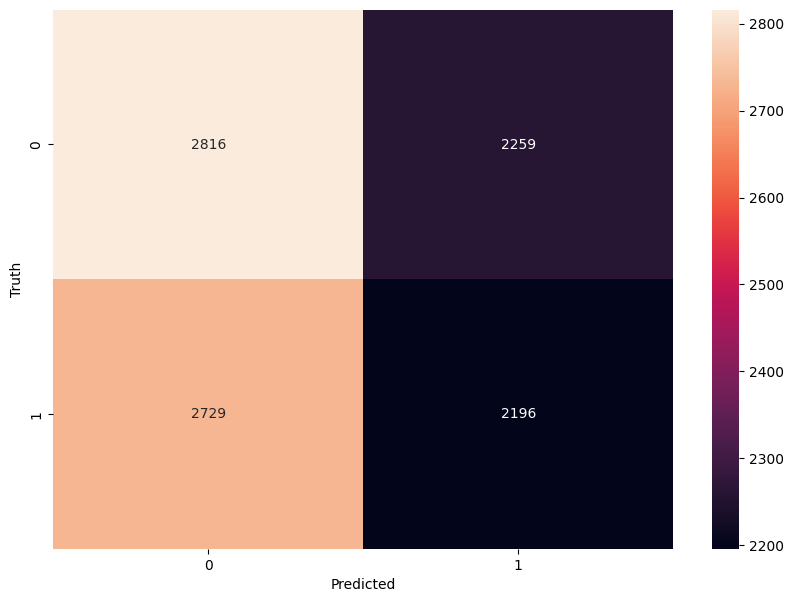

In [127]:
import seaborn as sn
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Accuracy

In [128]:
round((2816+2196)/(2816+2196+2729+2259),2)

0.5